Detailed overview of Basic Transformer Neural Network [StatQuest Youtube](https://www.youtube.com/watch?v=zxQyTK8quyY)

This is a simple Transformer Encoder Architechture

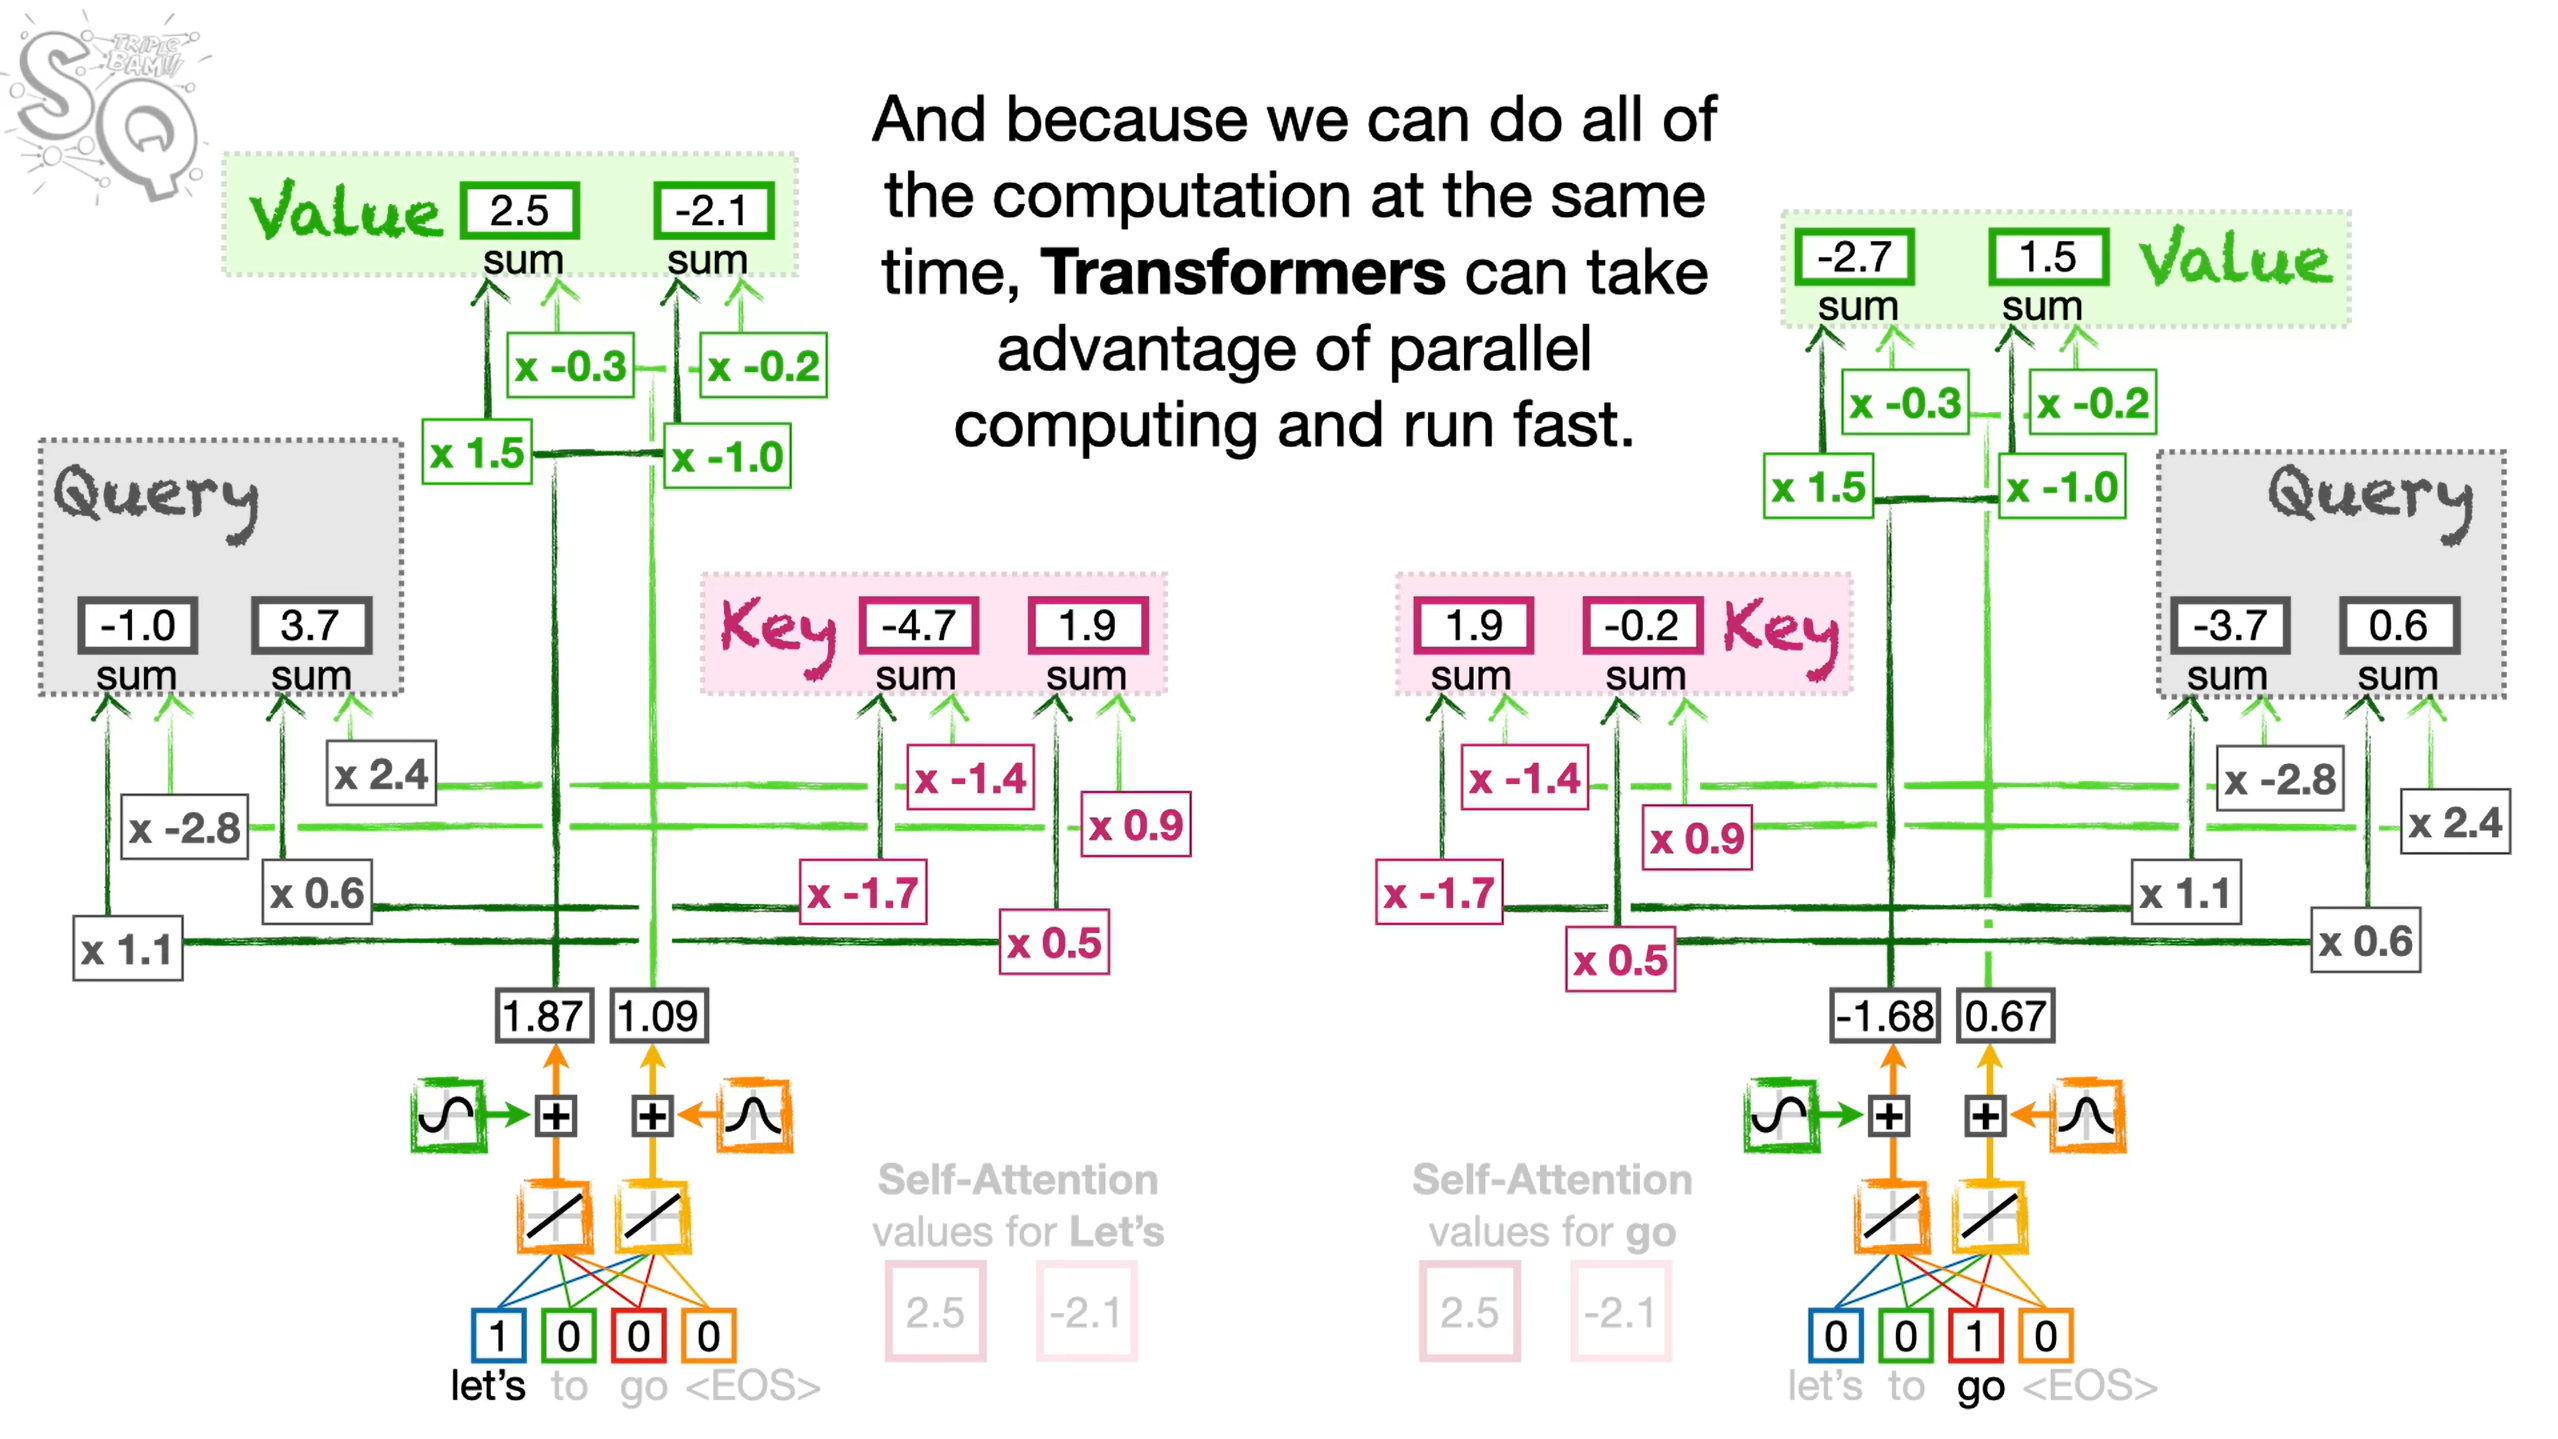
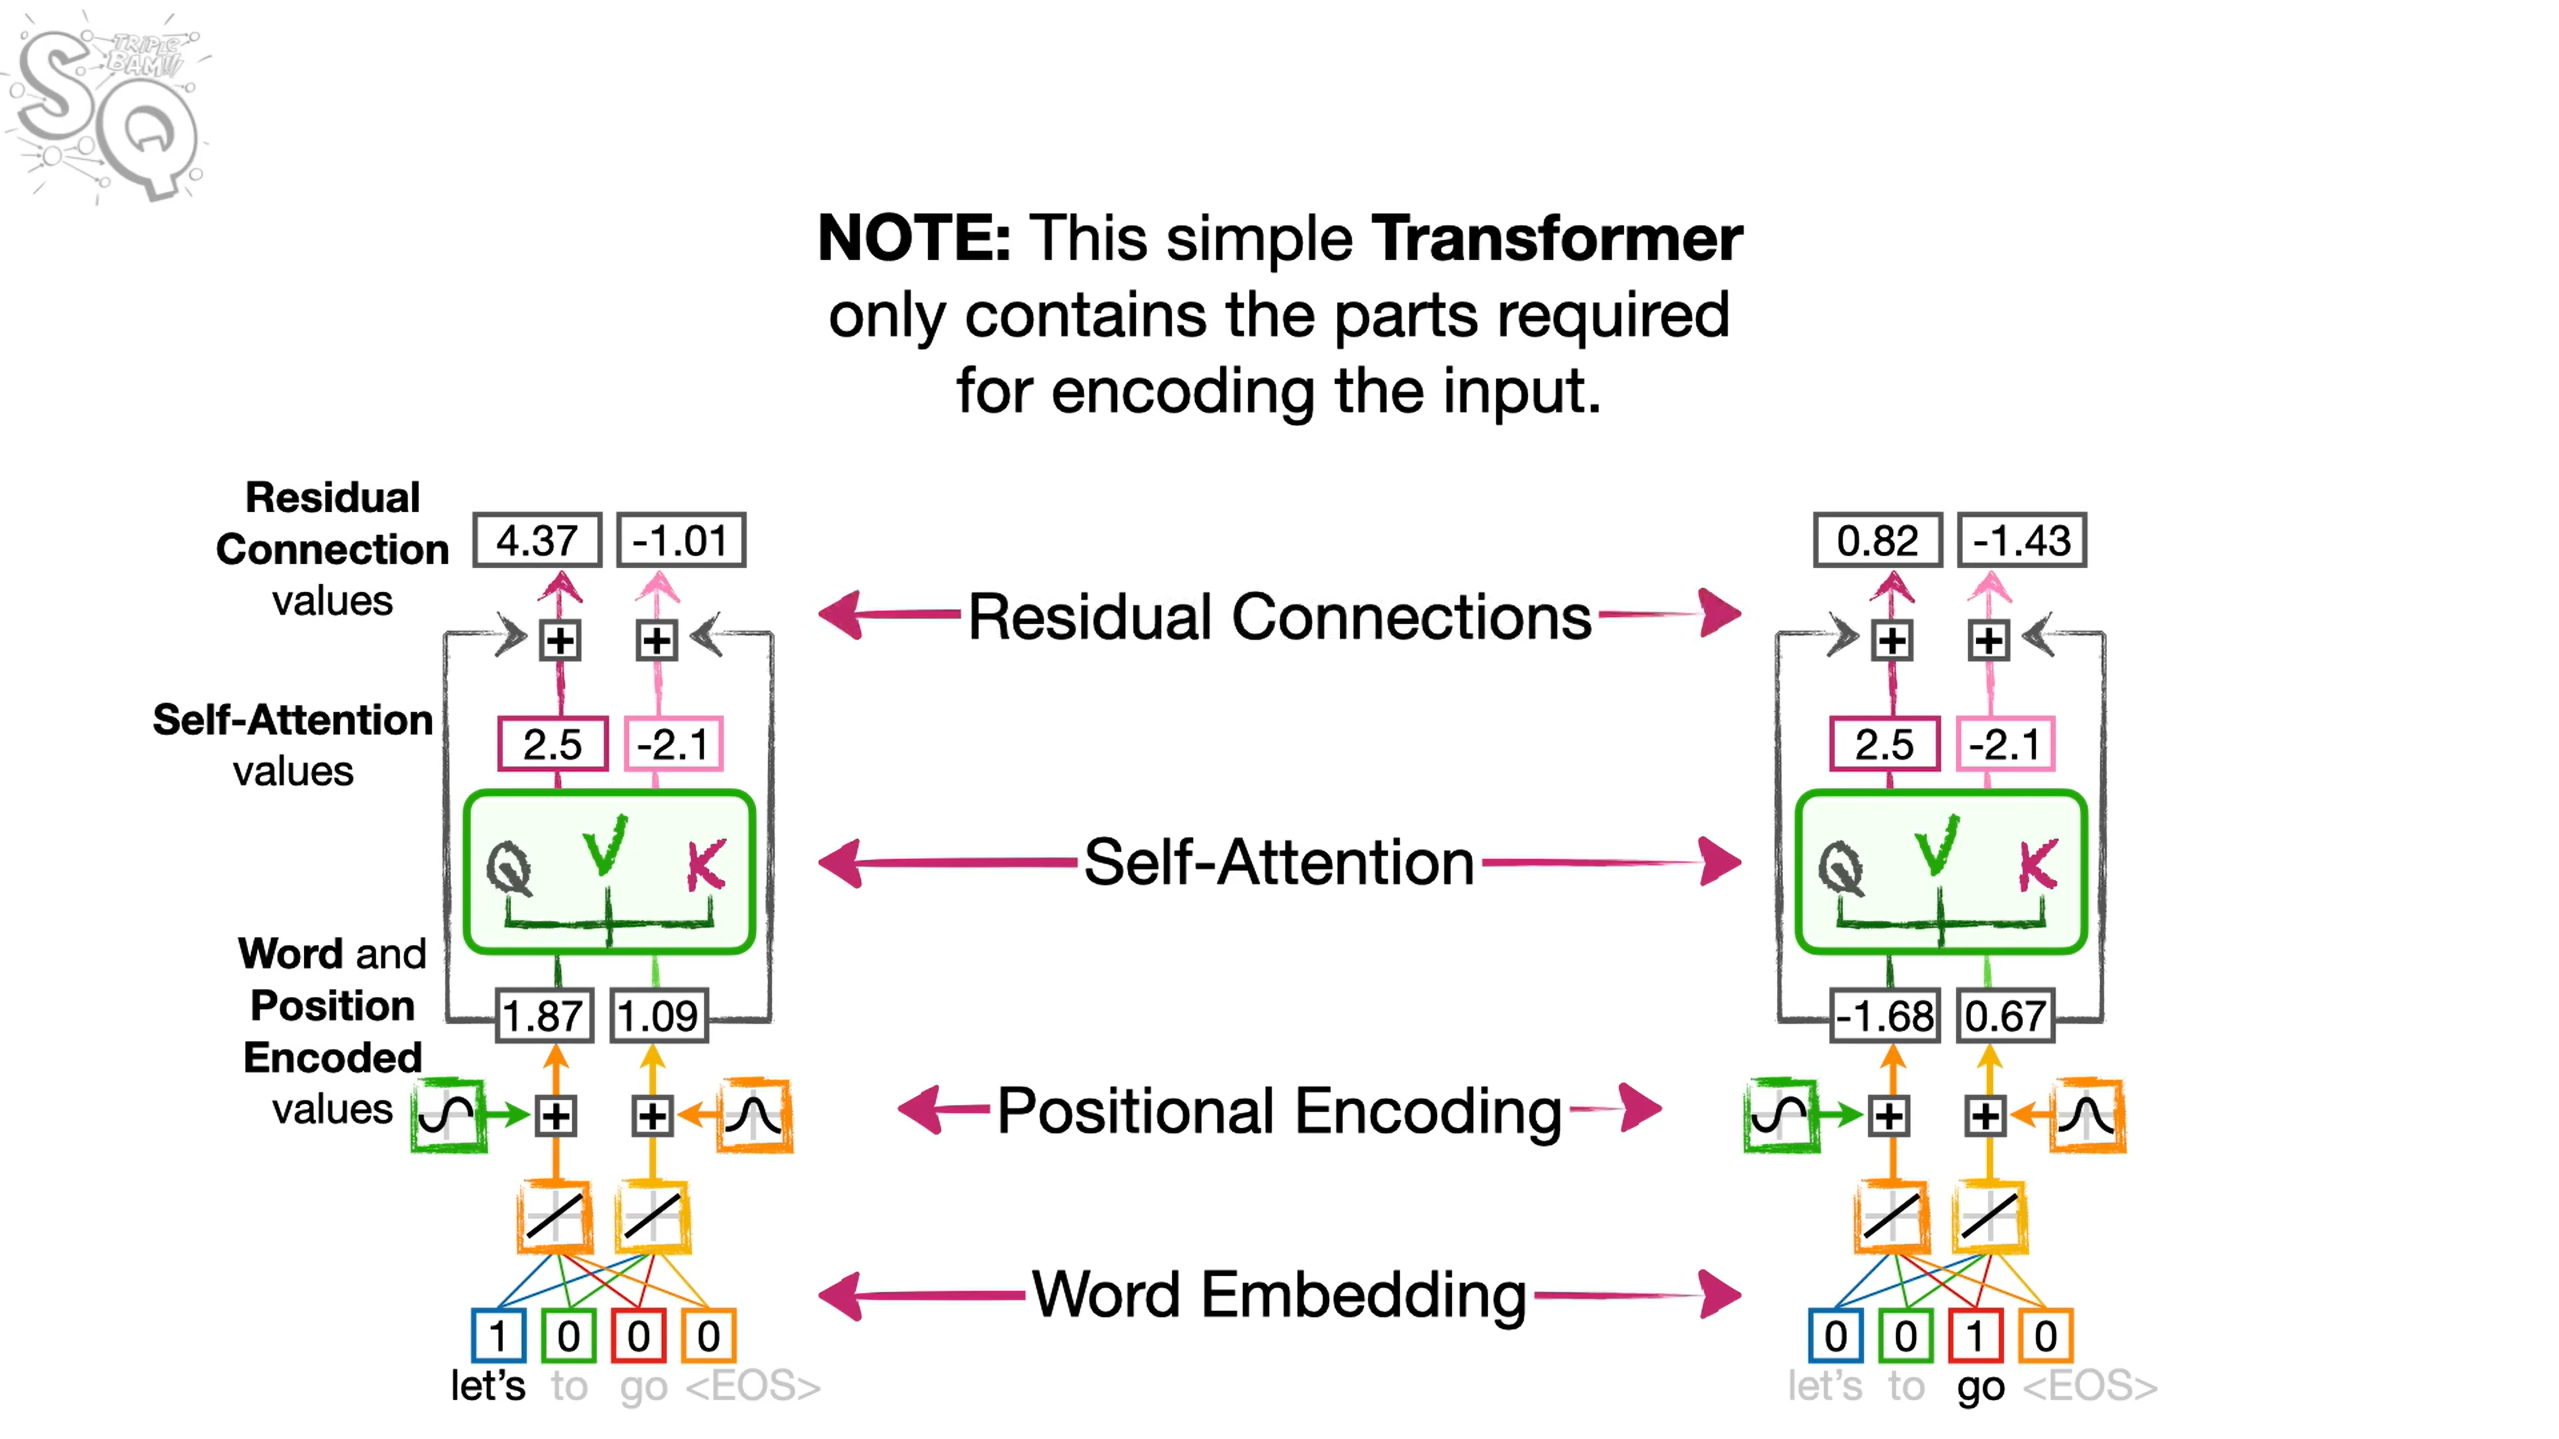

Encoder-Decoder Simple Architechture

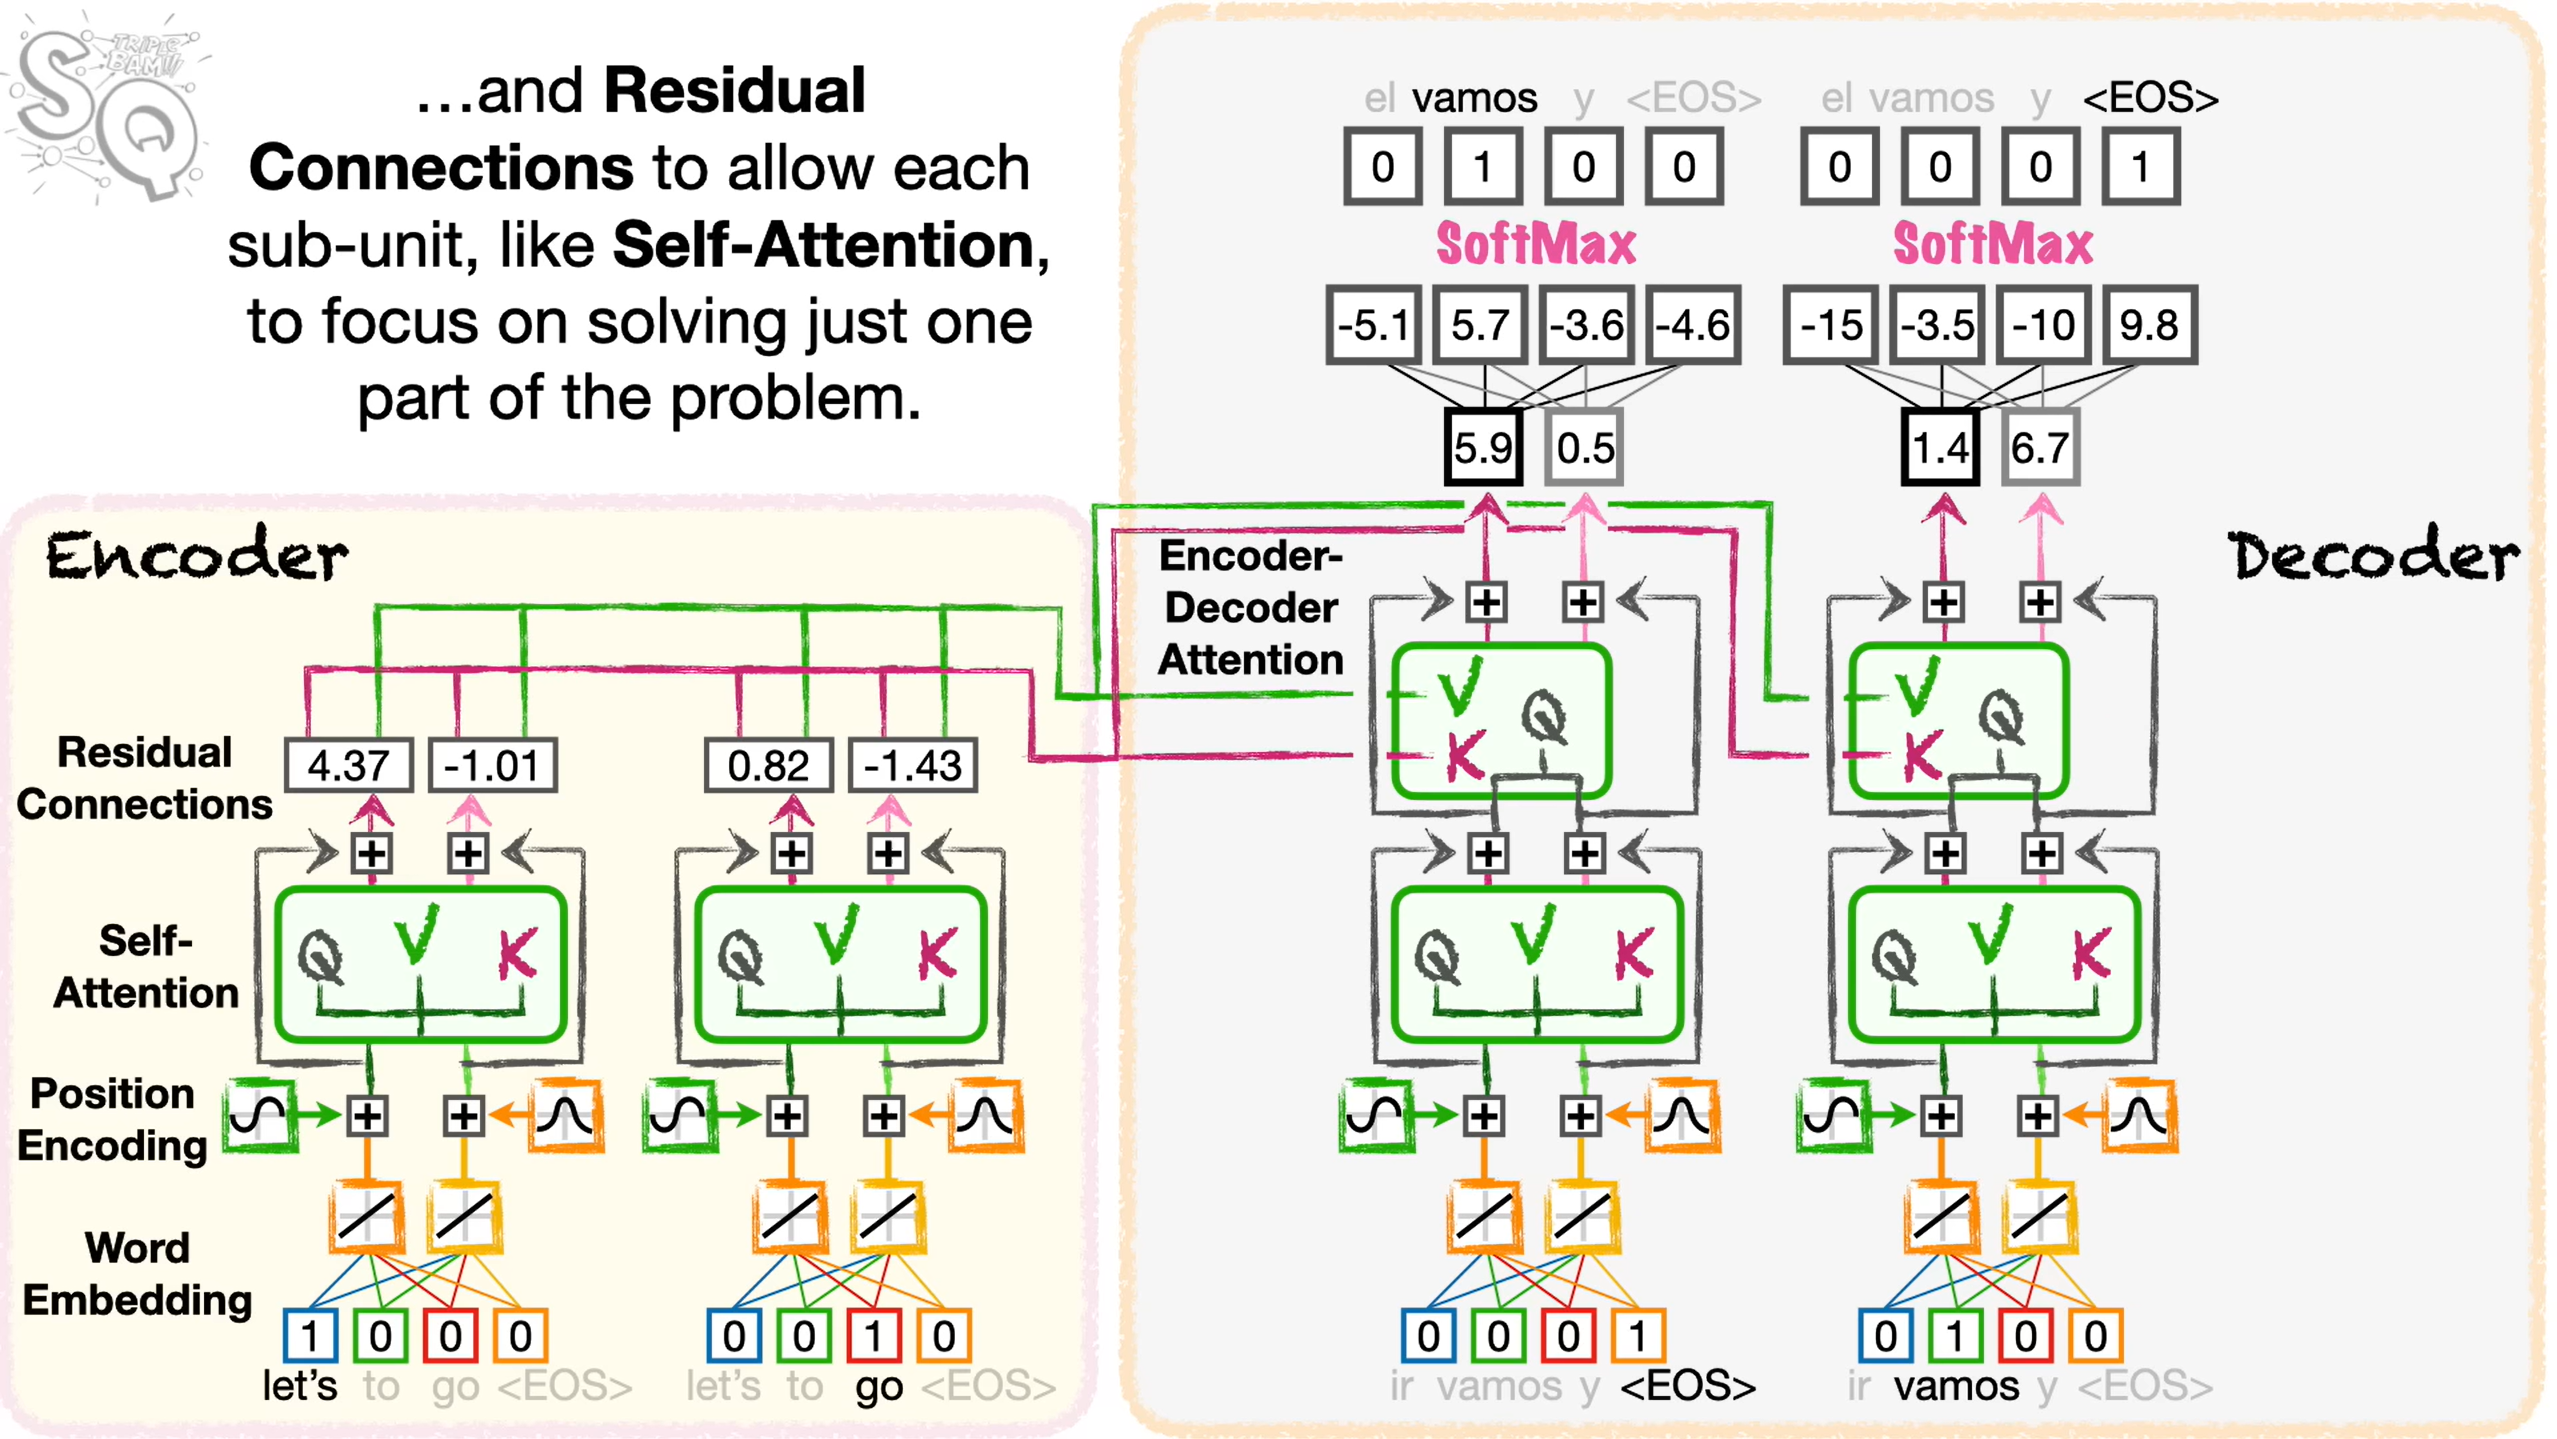



# HUGGING FACE TRANSFORMERS COURSE

## Chapter 1: Transformer Models

In [36]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
classifier(
    [
        "I've been waiting for a HuggingFace course my whole life.",
        "I hate this so much!",
    ]
)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
c:\Users\black\Desktop\Projects\transformers\transformer_env\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[{'label': 'POSITIVE', 'score': 0.9598049521446228},
 {'label': 'NEGATIVE', 'score': 0.9994558691978455}]

## Chapter 2: Using Hugging Face Transformers

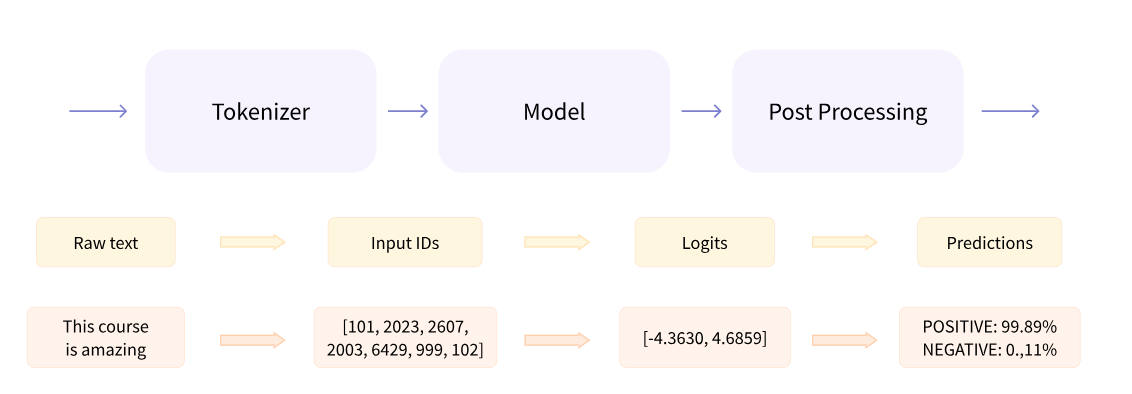

### Behind the Pipeline

#### Preprocessing with a tokenizer

A tokenizer is responsible for

 - Splitting the input into words, subwords, or symbols (like punctuation) that are called tokens
 - Mapping each token to an integer
 - Adding additional inputs that may be useful to the model

All this processing needs to be done in exactly the same ways as when the model was pretained.

In [37]:
from transformers import AutoTokenizer

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

Transformer models only accept `tensors` as input. To specify the type of tensors for output (PyTorch, TensorFlow, or NumPy), we use the `return_tensors` arg

In [38]:
raw_inputs = [
    "I've been waiting for a HuggingFace course my whole life.",
    "I hate this so much!",
]
inputs = tokenizer(raw_inputs, padding=True, truncation=True, return_tensors="pt")
print(inputs)

{'input_ids': tensor([[  101,  1045,  1005,  2310,  2042,  3403,  2005,  1037, 17662, 12172,
          2607,  2026,  2878,  2166,  1012,   102],
        [  101,  1045,  5223,  2023,  2061,  2172,   999,   102,     0,     0,
             0,     0,     0,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]])}


#### Going through the model

Downloading pretrained models is the same as downloading tokenizer. Transformers provides an AutoModel class which also has a from_pretrained() method:


In [39]:
from transformers import AutoModel

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModel.from_pretrained(checkpoint)

This architecture contains only the base Transformer module: given some inputs, it outputs what called hidden states, also known as features.

The vector output by the Transformer module is usually large. It generally has three dimensions:

- Batch size: The number of sequences processed at a time (2 in our example).
- Sequence length: The length of the numerical representation of the sequence (16 in our example).
- Hidden size: The vector dimension of each model input.

In [40]:
outputs = model(**inputs)
print(outputs.last_hidden_state.shape)

torch.Size([2, 16, 768])


Note that the ouputs ò Hugging Face Transformer models behave like namedtuples or dictionaries. Elements can be accessed by attributes or by key (`outputs['last_hidden_state']`), or even by index.

#### Model heads: Making sense out of numbers

The model heads take the high-dimensional vector of hidden states as input and project them onto a different dimension. They are usually composed of one or a few linear layers:

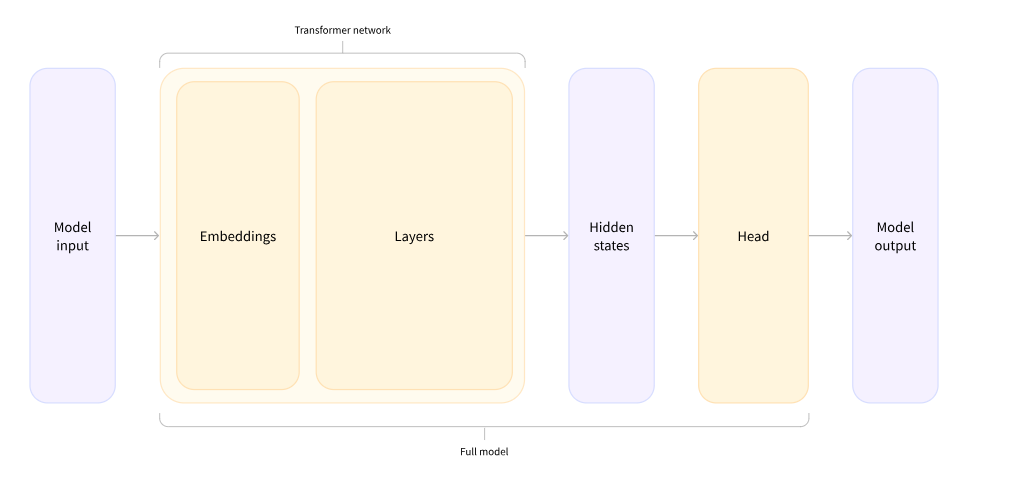

The output of the Transformer model is sent directly to the model head to be processed.

In this diagram, the model is represented by its embeddings layer and the subsequent layers. The embeddings layer converts each input ID in the tokenized input into a vector that represents the associated token. The subsequent layers manipulate those vectors using the attention mechanism to produce the final representation of the sentences.

For sequence classification head, we use AutoModelForSequenceClassification instead of AutoModel class.

In [41]:
from transformers import AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
outputs = model(**inputs)

print(outputs.logits.shape)

torch.Size([2, 2])


There are more architectures available:

- *Model (retrieve the hidden states)
- *ForCausalLM
- *ForMaskedLM
- *ForMultipleChoice
- *ForQuestionAnswering
- *ForSequenceClassification
- *ForTokenClassification
- and more...

### Post processing the output

The outputs from the model won't make sense. It has to go through softmax layer to get probabilities.

In [42]:
import torch

predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)

print(outputs.logits)
print(predictions)

tensor([[-1.5607,  1.6123],
        [ 4.1692, -3.3464]], grad_fn=<AddmmBackward0>)
tensor([[4.0195e-02, 9.5980e-01],
        [9.9946e-01, 5.4418e-04]], grad_fn=<SoftmaxBackward0>)


To get the label for each position, use the `id2label` attribute of the model config.

In [43]:
model.config.id2label

{0: 'NEGATIVE', 1: 'POSITIVE'}

### Models

#### Creating a Transformer

Initialize a BERT model and load a config object

In [44]:
from transformers import BertConfig, BertModel

config = BertConfig()
model = BertModel(config)

print(config)

BertConfig {
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.41.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}



#### Different loading methods

Loading a pretrained model

In [45]:
from transformers import BertModel

model = BertModel.from_pretrained("bert-base-cased")

#### Saving Method


In [46]:
# model.save_pretrained("directory_on_my_computer")

This will save 2 files into the directory.

The first one will be `config.json` file. This will store all the attributes necessary. It also contains some metadata regarding the model.

The second file will be `pytorch_model.bin` files. This file contains all the model weights.

#### Using transformer for inference

Transformer models can only process numbers that the tokenizer generates.

Exmaple:

In [47]:
sequences = ["Hello!", "Cool.", "Nice!"]

With the sequence above, the tokenizer will translate it into

In [48]:
encoded_sequences = [
    [101, 7592, 999, 102],
    [101, 4658, 1012, 102],
    [101, 3835, 999, 102],
]

Note that Tensors only accept recangular shapes.

In [49]:
import torch

model_inputs = torch.tensor(encoded_sequences)

#### Using the tensors as input to the model

While the model accepts a lot of different arguments, only the input IDs are necessary.

In [50]:
output = model(model_inputs)
print(output)

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[ 4.4496e-01,  4.8276e-01,  2.7797e-01,  ..., -5.4032e-02,
           3.9393e-01, -9.4770e-02],
         [ 2.4943e-01, -4.4093e-01,  8.1772e-01,  ..., -3.1917e-01,
           2.2992e-01, -4.1172e-02],
         [ 1.3668e-01,  2.2518e-01,  1.4502e-01,  ..., -4.6915e-02,
           2.8224e-01,  7.5566e-02],
         [ 1.1789e+00,  1.6738e-01, -1.8187e-01,  ...,  2.4671e-01,
           1.0441e+00, -6.1962e-03]],

        [[ 3.6436e-01,  3.2464e-02,  2.0258e-01,  ...,  6.0111e-02,
           3.2451e-01, -2.0996e-02],
         [ 7.1866e-01, -4.8725e-01,  5.1740e-01,  ..., -4.4012e-01,
           1.4553e-01, -3.7545e-02],
         [ 3.3223e-01, -2.3271e-01,  9.4876e-02,  ..., -2.5268e-01,
           3.2172e-01,  8.1125e-04],
         [ 1.2523e+00,  3.5754e-01, -5.1321e-02,  ..., -3.7840e-01,
           1.0526e+00, -5.6255e-01]],

        [[ 2.4042e-01,  1.4718e-01,  1.2110e-01,  ...,  7.6062e-02,
           3.3564e-01,  2

### Tokenizers

Tokenizers are one of the core component of the NLP pipeline. It converts text data into numbers that can be process by the model.

#### Word-based

Each word gets assigned an unique ID. Since very similar word can mean differently, they get different ID. As a result, the vocab list can be very large.

There are 2 types of splitting up the sentence for the word-based tokenizer to assign IDs.
- Split on spaces: `[let's, go!]`
- Split on punctuation: `[let, 's, go, !]`

In [51]:
tokenized_text = "I'm learning about Transformers!".split()

print(tokenized_text)

["I'm", 'learning', 'about', 'Transformers!']


Furthermore, words like `dog` are represented differently from words like `dogs`, and the model will initially have no way of knowing that `dog` and `dogs` are similar: it will identify the two words as unrelated. The same applies to other similar words, like `run` and `running`, which the model will not see as being similar initially.

When a word is ignore in the library, it is shown as an "unknown" token: `[unk]` or `<unk>`

#### Character-based

This type of tokenizer will be much smaller in size since the vocabulay list for character is significantly smaller.

`[l, e, t, ', s, g, o, !]`

The downside to this method is each token (or char) does not mean a lot on its own (excepts symbols like Chinese).

Another downside is the amount of token to be process now is much larger since a single token for a word has to split up to multiple token for characters that made up that word.

#### Subword tokenization

Subword tokenization take the best of both Word-bases and Character-based tokenization. It split up the rarely used words into 2 subwords, and keep the frequently used words the same.

For instance, “annoyingly” might be considered a rare word and could be decomposed into “annoying” and “ly”. These are both likely to appear more frequently as standalone subwords, while at the same time the meaning of “annoyingly” is kept by the composite meaning of “annoying” and “ly”.

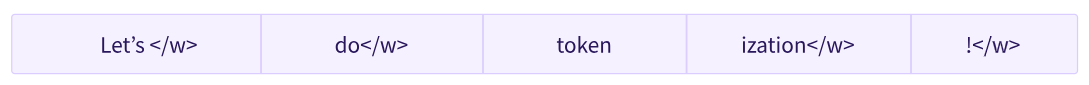

These subwords end up providing a lot of semantic meaning: for instance, in the example above “tokenization” was split into “token” and “ization”, two tokens that have a semantic meaning while being space-efficient (only two tokens are needed to represent a long word). This allows us to have relatively good coverage with small vocabularies, and close to no unknown tokens.

#### Loading and Saving

Load and save tokenizer is the same as doing that for model. It uses `from_pretrained()` and `save_pretrained()`

In [52]:
# from transformers import BertTokenizer

# tokenizer = BertTokenizer.from_pretrained("bert-base-cased")

Or similar to AutoModel, the AutoTokenizer class will grab the proper tokenizer class in the library based on the checkpoint name.

In [53]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")
tokenizer("Hello how are you doing?")

{'input_ids': [101, 8667, 1293, 1132, 1128, 1833, 136, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}

Saving tokenizer is the same as saving a model

In [54]:
# tokenizer.save_pretrained("directory_on_my_computer")

#### Encoding

There are 2 steps:
- Split up the sentence into tokens.
- Translate the token into numbers that has meaning to the model.

#### Tokenization

The tokenization process is done by the `tokenize()` method of the tokenizer.

In [55]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

sequence = "Using a Transformer network is simple"
tokens = tokenizer.tokenize(sequence)

print(tokens)

['Using', 'a', 'Trans', '##former', 'network', 'is', 'simple']


This is a subword tokenizer.

#### From tokens to input IDs

The conversion to input IDS is handled by the `convert_tokens_to_id()` tokenizer method

In [56]:
ids = tokenizer.convert_tokens_to_ids(tokens)

print(ids)

[7993, 170, 13809, 23763, 2443, 1110, 3014]


#### Decoding

Decoding is to translate from those random number back to a string. It uses `decode()` method to do so.

In [57]:
decoded_string = tokenizer.decode([7993, 170, 11303, 1200, 2443, 1110, 3014])
print(decoded_string)

Using a transformer network is simple


The `decoder` not only translate the indices back to tokens but also groups together the tokens that were part of the same word to produce a readable sentence.

### Handling multiple sequences

#### Models expect a batch of inputs

Transformer model expect multiple sentences by default.
As a result, if passing a single sentence, an extra layer needed to be added. That is `[token_ids]`

`Batching` is the act of sending multiple sentences through the model, all at once. If it is a single sentence, the batch can be built by doing `batched_ids = [ids, ids]`

#### Padding the inputs

Non-rectangular shape ids cannot be converted into a tensor. Because of that, we need to add padding to the token ids. It is called `tokenizer.pad_token_id`

In [58]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)

sequence1_ids = [[200, 200, 200]]
sequence2_ids = [[200, 200]]
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

print(model(torch.tensor(sequence1_ids)).logits)
print(model(torch.tensor(sequence2_ids)).logits)
print(model(torch.tensor(batched_ids)).logits)

tensor([[ 1.5694, -1.3895]], grad_fn=<AddmmBackward0>)
tensor([[ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)
tensor([[ 1.5694, -1.3895],
        [ 1.3374, -1.2163]], grad_fn=<AddmmBackward0>)


Because of the padding, the value of the 2nd sequence id is off. We need attention mask for it.

#### Attention Masks

Attention masks are tensors with the exact same shape as the input IDs tensor. It is filled with 0s and 1s indicating which one need to attend to. 1 for yes, 0 for no.

In [59]:
batched_ids = [
    [200, 200, 200],
    [200, 200, tokenizer.pad_token_id],
]

attention_mask = [
    [1, 1, 1],
    [1, 1, 0],
]

outputs = model(torch.tensor(batched_ids), attention_mask=torch.tensor(attention_mask))
print(outputs.logits)

tensor([[ 1.5694, -1.3895],
        [ 0.5803, -0.4125]], grad_fn=<AddmmBackward0>)


The 2nd id sequence is now correct.

#### Longer Sequences

With Transformer models, there is a limit to the lengths of the sequences can be passed into the models.
Most model can handle upto 512 or 1024 tokens. It can crash if input longer.

Solution:
- Use model that can support longer sequence length
- Truncate the sequences.

It is recommded to truncate the sequence by specifying the `max_sequence_length` parameter

In [60]:
MAX_SEQUENCE_LENGTH = 512
sequence = sequence[:MAX_SEQUENCE_LENGTH]

### Putting it all together

The high level function `tokenizer()` has everything done for us as a encoder to have it safely input into the model. We only have to initialize the correct `arguments` when calling `tokenizer()`
- Split up a sequence into tokens.
- Convert from tokens to ids
- Mask the token ids with padding
- Add attention layers
- Truncate sequences
- And convert to tensors

In [64]:
# A sequence to encode
sequence = "I'm testing out my knowledge on Hugging Face Transformer encoder"
print(f"This is the sequence that will be translated: {sequence}\n")

# Setting up the environment
tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# Print out the result in each steps of the encoder
tokens = tokenizer.tokenize(sequence)
print(f"These are the tokens: {tokens}\n")
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f"These are the token ids: {token_ids}\n")

encoded_sequence = tokenizer(sequence)
print(f"This is the encoded sequence from tokenizer: {encoded_sequence}\n")

# Decoded string
decoded_string = tokenizer.decode(token_ids)
print(f"The decoded string from the manual steps: {decoded_string}\n")
decoded_string = tokenizer.decode(encoded_sequence["input_ids"])
print(f"The decoded string from the tokenizer: {decoded_string}\n")

This is the sequence that will be translated: I'm testing out my knowledge on Hugging Face Transformer encoder

These are the tokens: ['I', "'", 'm', 'testing', 'out', 'my', 'knowledge', 'on', 'Hu', '##gging', 'Face', 'Trans', '##former', 'en', '##code', '##r']

These are the token ids: [146, 112, 182, 5193, 1149, 1139, 3044, 1113, 20164, 10932, 10289, 13809, 23763, 4035, 13775, 1197]

This is the encoded sequence from tokenizer: {'input_ids': [101, 146, 112, 182, 5193, 1149, 1139, 3044, 1113, 20164, 10932, 10289, 13809, 23763, 4035, 13775, 1197, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

The decoded string from the manual steps: I'm testing out my knowledge on Hugging Face Transformer encoder

The decoded string from the tokenizer: [CLS] I'm testing out my knowledge on Hugging Face Transformer encoder [SEP]



#### Special tokens

If look closely at the decoded sequence, the built-in tokenizer has added special tokens `[CLS]` and `[SEP]` marking the beginning and the end of the setence.

#### Wrapping up: From tokenizer to model

Now that we’ve seen all the individual steps the tokenizer object uses when applied on texts, let’s see one final time how it can handle multiple sequences (padding!), very long sequences (truncation!), and multiple types of tensors with its main API.

In [70]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

checkpoint = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = AutoModelForSequenceClassification.from_pretrained(checkpoint)
sequences = ["I've been waiting for a HuggingFace course my whole life.", "So have I!"]

tokens = tokenizer(sequences, padding=True, truncation=True, return_tensors="pt")
output = model(**tokens)
print(output.logits)

output = torch.nn.functional.softmax(output.logits, dim=-1)
print(output)

tensor([[-1.5607,  1.6123],
        [-3.6183,  3.9137]], grad_fn=<AddmmBackward0>)
tensor([[4.0195e-02, 9.5980e-01],
        [5.3534e-04, 9.9946e-01]], grad_fn=<SoftmaxBackward0>)
